<a href="https://colab.research.google.com/github/FaithOsamaye/Nigeria_Car_Price/blob/main/Nigeria_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [177]:
data = pd.read_csv('nigeria_car_prices.csv',parse_dates=True)

data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [178]:
data.shape

(3722, 20)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

In [180]:
data.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3.722000e+03,3722.000000,3.663000e+03,3.661000e+03,788.000000,826.000000,755.000000
mean,4.514644e+06,2008.145889,1.949841e+05,1.108062e+04,5.285533,5.157385,208.831788
std,4.297012e+06,4.205670,1.395755e+05,1.091127e+05,0.800853,1.202795,70.940925
min,5.500000e+05,1979.000000,1.000000e+00,1.800000e+02,2.000000,4.000000,83.000000
25%,2.310000e+06,2005.000000,1.173945e+05,2.000000e+03,5.000000,4.000000,158.000000
50%,3.360000e+06,2008.000000,1.762900e+05,2.500000e+03,5.000000,6.000000,203.000000
75%,5.036250e+06,2011.000000,2.453815e+05,3.500000e+03,5.000000,6.000000,268.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


<Axes: >

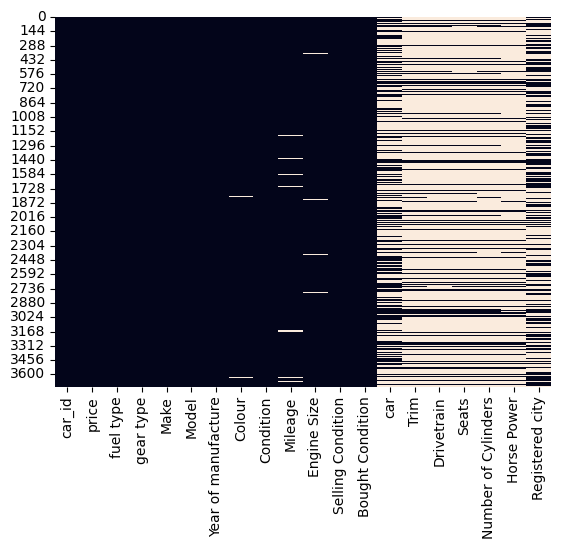

In [181]:
#Handling missing data
sns.heatmap(data.isnull(),cbar=False)

In [182]:
data['Year of manufacture']= data['Year of manufacture'].astype('object')

In [183]:
data['Colour'].fillna(data['Colour'].mode().iloc[0],inplace=True)
data['fuel type'].ffill(inplace=True)
data['gear type'].ffill(inplace=True)
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)
data['Engine Size'].fillna(data['Engine Size'].mean(), inplace=True)
data['car'].fillna(data['car'].mode().iloc[0],inplace=True)
data['Trim'].fillna(data['Trim'].mode().iloc[0],inplace=True)
data['Drivetrain'].fillna(data['Drivetrain'].mode().iloc[0],inplace=True)
data['Seats'].fillna(data['Seats'].mode().iloc[0],inplace=True)
data['Number of Cylinders'].fillna(data['Number of Cylinders'].mean(), inplace=True)
data['Horse Power'].fillna(data['Horse Power'].mean(), inplace=True)
data['Registered city'].fillna(data['Registered city'].mode().iloc[0],inplace=True)

In [184]:
data['Registered city'].replace(['LAGOS','LAGOS STATE','Lagso','lagos'], 'Lagos',inplace=True)
data['Registered city'].replace(['Abuja','ABUJA'], 'FCT',inplace=True)
data['Registered city'].replace(['RIVERS','Rivers','RIVERS STATE','RIVER STATE','Rivers state'], 'Rivers',inplace=True)
data['Registered city'].replace(['EDO','BENIN'], 'Edo',inplace=True)
data['Registered city'].replace(['NASARAWA','NASSARAWA','Nasarawa','NASARRAWA'], 'Nasarawa',inplace=True)
data['Registered city'].replace(['Plateau','PLATEAU STATE','PLATEAU'], 'Plateau',inplace=True)
data['Registered city'].replace(['Delta','ASABA','DELTA','Delta state'], 'Delta',inplace=True)
data['Registered city'].replace(['Osun','OSUN','OSUN STATE'], 'Osun',inplace=True)
data['Registered city'].replace(['OYO','Oyo','ABEOKUTA'], 'Oyo',inplace=True)
data['Registered city'].replace(['Ondo','ONDO','AKURE'], 'Ondo',inplace=True)
data['Registered city'].replace(['Ogun','OGUN'], 'Ogun',inplace=True)
data['Registered city'].replace(['CROSS RIVER'], 'Cross River',inplace=True)
data['Registered city'].replace(['Imo','IMO'], 'Imo',inplace=True)
data['Registered city'].replace(['BENUE','BENUE STATE','Benue'], 'Benue',inplace=True)
data['Registered city'].replace(['AKWA IBOM','Akwa-Ibom'], 'Akwa Ibom',inplace=True)
data['Registered city'].replace(['Kano State','KANO'], 'Kano',inplace=True)
data['Registered city'].replace(['sokoto'], 'Sokoto',inplace=True)
data['Registered city'].replace(['KADUNA'], 'Kaduna',inplace=True)
data['Registered city'].replace(['FKJ-880HM','0'], 'Lagos',inplace=True)
data['Registered city'].replace(['KWARA'], 'Kwara',inplace=True)

In [185]:
#Outliers

q3 = data['price'].quantile(0.75)
q1 = data['price'].quantile(0.25)

iqr = q3-q1 #also called interquartle range or q2 or 50%

print(f'The Q1 value is:', (q1))
print(f'The Q2/IQR value is:', (iqr))
print(f'The Q3 value is:', (q3))


The Q1 value is: 2310000.0
The Q2/IQR value is: 2726250.0
The Q3 value is: 5036250.0


In [186]:
lower_threshold = q1 - 1.5*iqr
higher_threshold = q3 + 1.5*iqr

#lets check for the outliers

outliers = data[(data['price'] < lower_threshold) | (data['price'] > higher_threshold)]

outliers.shape

(307, 20)

<Axes: xlabel='price'>

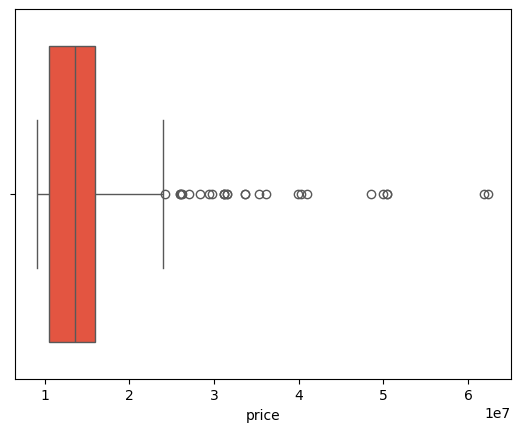

In [187]:
sns.boxplot(x='price', data=outliers,  palette='CMRmap')

In [188]:
data.drop(columns=['car_id','Trim'], axis=1, inplace=True)



**1. How many cars are registered?**

Text(0.5, 0, 'Selling Condition')

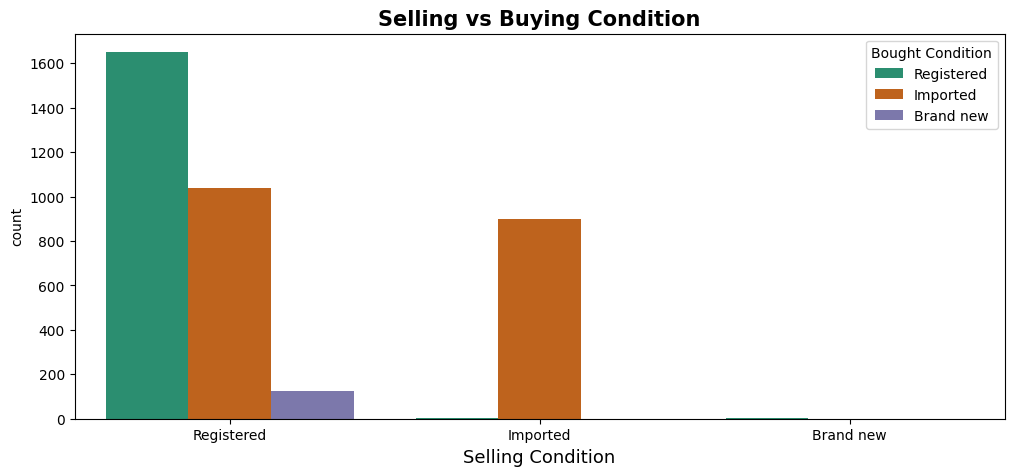

In [189]:
plt.figure(figsize=(12,5))
sns.countplot(hue='Bought Condition', x='Selling Condition',data=data,palette='Dark2')
plt.title('Selling vs Buying Condition', weight='bold', fontsize=15)
plt.xlabel('Selling Condition', fontsize=13)

**2. What is the fuel type percentage and the gear type percentage**

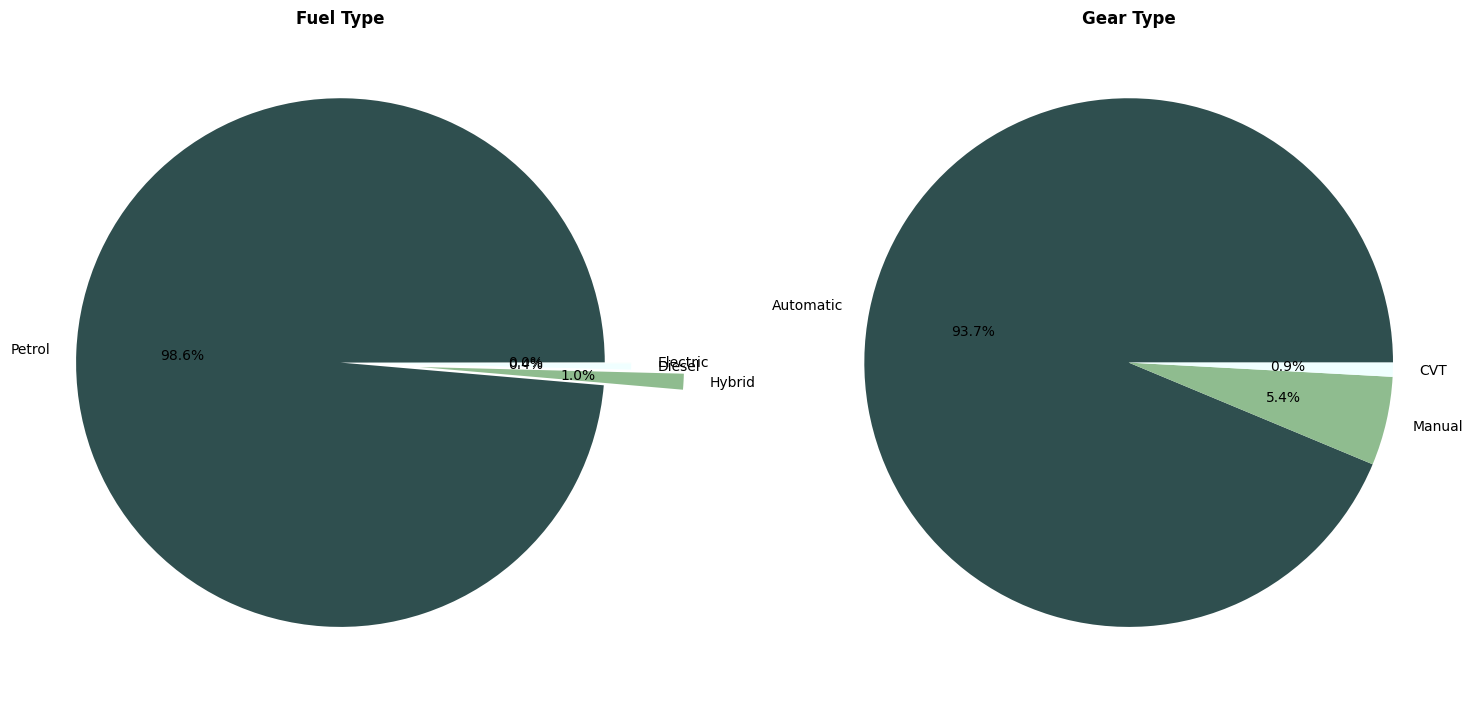

In [190]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
explode = [0, 0.3,0.1,0.1]
col = ['darkslategrey','darkseagreen','azure','mintcream']

fuel = data['fuel type'].value_counts()
gear = data['gear type'].value_counts()

axes[0].pie(fuel, autopct = '%1.1f%%',labels = fuel.index,colors = col,explode=explode)
axes[0].set_title('Fuel Type',weight='bold')
axes[1].pie(gear,autopct = '%1.1f%%',labels = gear.index,colors = col)
axes[1].set_title('Gear Type', weight='bold')

plt.tight_layout()

**3. The year that had the most cars produced?**

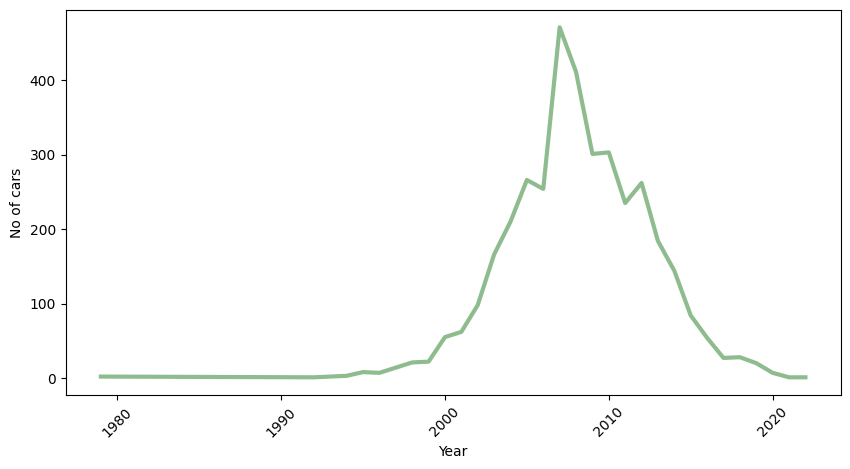

In [191]:
plt.figure(figsize=(10,5))
years = data['Year of manufacture'].value_counts()
sns.lineplot(data=years,errorbar=None, color= 'darkseagreen', linewidth=3, markers='o',markerfacecolor='black',markersize=5)
plt.xlabel('Year')
plt.ylabel('No of cars')
plt.xticks(rotation=45)
plt.show()

**4. What year was the cars made?**

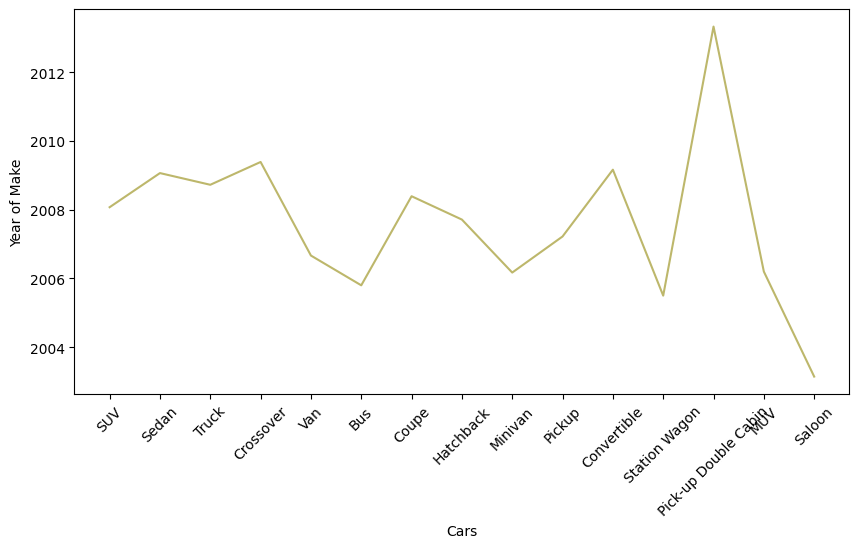

In [192]:
plt.figure(figsize=(10,5))
sns.lineplot(x='car',y='Year of manufacture',data=data,errorbar=None, color= 'darkkhaki')
plt.xlabel('Cars')
plt.ylabel('Year of Make')
plt.xticks(rotation=45)
plt.show()

**5. What is the city that generates the most amount from the sales of car?**

<Axes: xlabel='Registered city'>

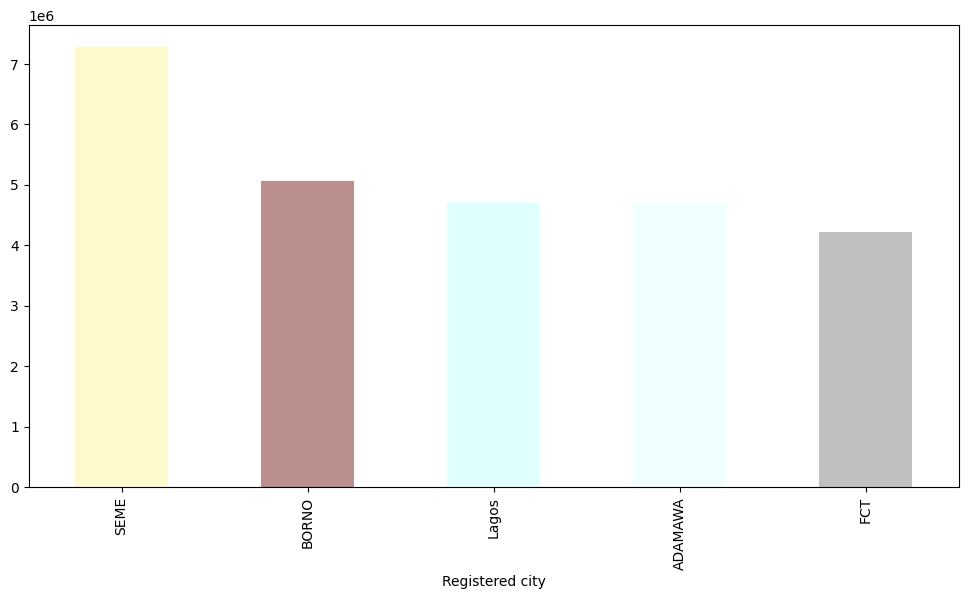

In [193]:
city = data.groupby('Registered city')['price'].mean()
cities= city.nlargest(n=5)
#cities = cities.sort_values('price',ascending=False)
plt.figure(figsize=(12,6))
cities.plot(kind='bar',y='price',x='Registered city', color=['lemonchiffon','rosybrown','lightcyan','azure','silver'])

**6. What numerical column has the most impact on our data?**

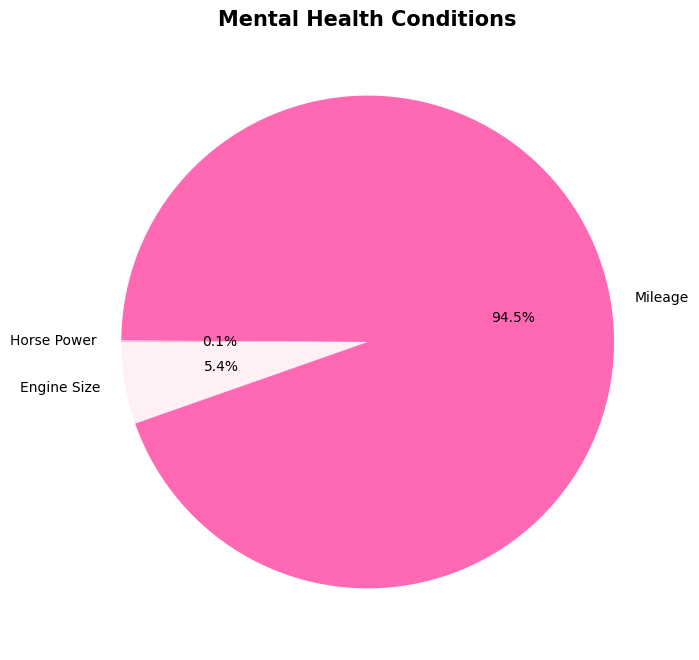

In [194]:
car_columns = ['Engine Size','Mileage','Horse Power']
Car = [data[columns].sum() for columns in car_columns]
col=['lavenderblush','hotpink','pink']

plt.figure(figsize=(8,8))
plt.pie(Car, autopct='%1.1f%%', labels=car_columns,startangle=180,colors=col)
plt.title('Mental Health Conditions', weight='bold',fontsize=15)
plt.show()

# Regression Models

In [195]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso

In [196]:
lb= LabelEncoder()
ss = StandardScaler()
mm = MinMaxScaler()

<Axes: >

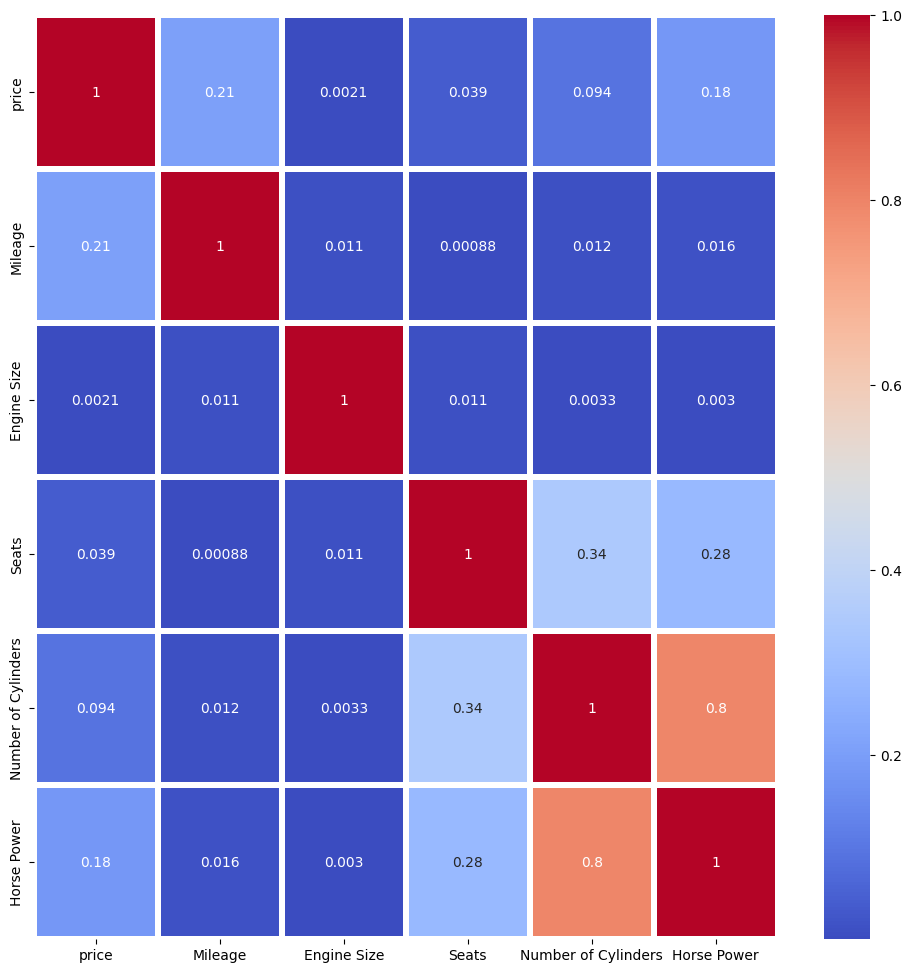

In [197]:
#plot correlation matrix
import seaborn as sns
corr = data.corr().abs()
plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True,cmap='coolwarm', linewidth=4, linecolor='white')

In [198]:
# get column of coreelation betwen price and other columns
data.corr().reset_index()[["index" ,"price"]]

,index,price
0,price,1.000000
1,Mileage,-0.206552
2,Engine Size,0.002147
3,Seats,0.039311
4,Number of Cylinders,0.094117
5,Horse Power,0.181130


In [199]:
data['Mileage'] = ss.fit_transform(data['Mileage'].values.reshape(-1, 1))
data['Horse Power'] = ss.fit_transform(data['Horse Power'].values.reshape(-1, 1))
data['Seats'] = ss.fit_transform(data['Seats'].values.reshape(-1, 1))
data['Number of Cylinders'] = ss.fit_transform(data['Number of Cylinders'].values.reshape(-1, 1))

In [200]:
X=data[["Year of manufacture","Model","Colour","Condition","Registered city","Mileage","Horse Power","Seats","Number of Cylinders"]]
y=data['price']

In [201]:
#apply label encoder on the list of categorical columns
for col in X:
    X = pd.get_dummies(X, columns=[col])

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [203]:
#LINEAR REGRESSION
lr = LinearRegression()

lr.fit(X_train,y_train)

pred = lr.predict(X_test)

lin_mae = round(mean_absolute_error(pred,y_test),2)
lin_r2 = round(r2_score(pred,y_test),2)
lin_mse = round(mean_squared_error(pred,y_test),2)


In [204]:
print('The test score is :',round(lr.score(X_test, y_test),2))
print('The train score is :',lr.score(X_train,y_train))

The test score is : 0.68
The train score is : 1.0


In [205]:
ylist = y_test.to_list()

In [206]:
print('top 5 predicted price is : ', np.round(pred[:5],2))
print('top 5 ytest is : ', ylist[:5])

top 5 predicted price is :  [2361115.34 1898263.78 9135000.   2600000.   5330021.18]
top 5 ytest is :  [1890000, 1420000, 9135000, 2600000, 6825000]


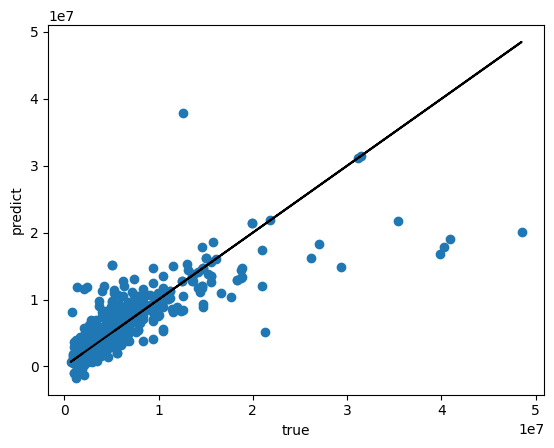

In [207]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**Lasso Regression**

In [208]:
las_model = Lasso(alpha=50,max_iter=100,tol=0.1)

las_model.fit(X_train,y_train)

las_pred = las_model.predict(X_test)

las_mae =round(mean_absolute_error(las_pred,y_test),2)
las_r2 = round(r2_score(las_pred,y_test),2)
las_mse = round(mean_squared_error(las_pred,y_test),2)

In [209]:
print('The test score is :', round(las_model.score(X_test, y_test),2))
print('The train score is :', round(las_model.score(X_train,y_train),2))

The test score is : 0.68
The train score is : 1.0


In [210]:
print('top 5 predicted price is : ', np.round(las_pred[:5],2))
print('top 5 y_test is : ', ylist[:5])

top 5 predicted price is :  [3175914.09 1804207.73 9274317.63 2476775.51 5448148.79]
top 5 y_test is :  [1890000, 1420000, 9135000, 2600000, 6825000]


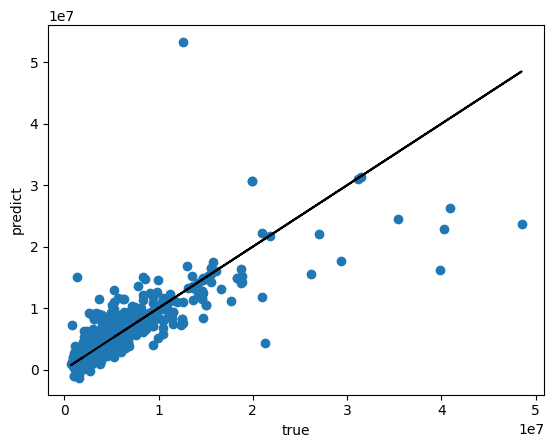

In [211]:
plt.scatter(x=y_test, y=las_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**Ridge Regression**

In [212]:
rid = Ridge(alpha=0)

rid.fit(X_train,y_train)

rid_pred = rid.predict(X_test)

rid_mae = round(mean_absolute_error(rid_pred,y_test),2)
rid_r2 = round(r2_score(rid_pred,y_test),2)
rid_mse = round(mean_squared_error(rid_pred,y_test),2)

In [213]:
print('The test score is :', round(rid.score(X_test, y_test),2))
print('The train score is :',rid.score(X_train,y_train))

The test score is : 0.68
The train score is : 1.0


In [214]:
print('top 5 predicted price is : ', np.round(rid_pred[:5],2))
print('top 5 y_test is : ', ylist[:5])

top 5 predicted price is :  [2772208.   1896472.14 9135000.   2600000.   5328102.13]
top 5 y_test is :  [1890000, 1420000, 9135000, 2600000, 6825000]


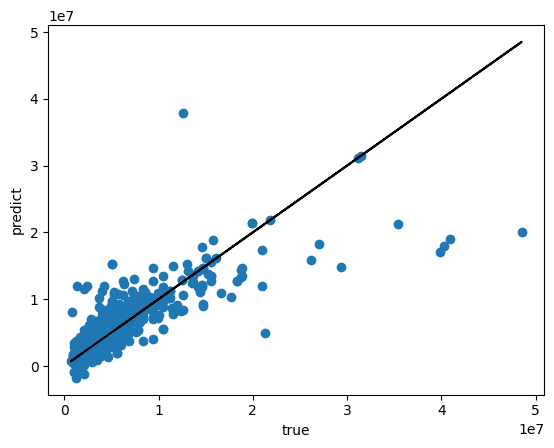

In [215]:
plt.scatter(x=y_test, y=rid_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**Reducing the features using PCA**

In [216]:
X.shape

(3722, 3616)

In [217]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)

X_pca = pca.fit_transform(X)

X_pca.shape

(3722, 573)

In [218]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.3,random_state=0)

In [219]:
#LINEAR REGRESSION
lin_model = LinearRegression()

lin_model.fit(X_train_pca,y_train)

pca_lin_pred = lin_model.predict(X_test_pca)

pca_lin_mae =round(mean_absolute_error(pca_lin_pred,y_test),2)
pca_lin_r2 = round(r2_score(pca_lin_pred,y_test),2)
pca_lin_mse =round(mean_squared_error(pca_lin_pred,y_test),2)

In [220]:
#LASSO REGRESSION
las = Lasso(alpha=50,max_iter=100,tol=0.1)

las.fit(X_train_pca,y_train)

las = las.predict(X_test_pca)

pca_las_mae =round(mean_absolute_error(las,y_test),2)
pca_las_r2 =round(r2_score(las,y_test),2)
pca_las_mse =round(mean_squared_error(las,y_test),2)

In [221]:
#RIDGE REGRESSION
ridg = Ridge(alpha=0)

ridg.fit(X_train_pca,y_train)

rid = ridg.predict(X_test_pca)

pca_rid_mae = round(mean_absolute_error(rid,y_test),2)
pca_rid_r2 =round(r2_score(rid,y_test),2)
pca_rid_mse =round(mean_squared_error(rid,y_test),2)

In [222]:
result_data = [
    {"Model_name": "Linear Regression", "R2": lin_r2, "PCA_R2":pca_lin_r2,"MAE": lin_mae, "PCA_MAE":pca_lin_mae, "MSE": lin_mse, "PCA_MSE":pca_lin_mse},
    {"Model_name": "LassoRegression",  "R2": las_r2, "PCA_R2":pca_las_r2,"MAE": las_mae, "PCA_MAE":pca_las_mae,"MSE": las_mse, "PCA_MSE":pca_las_mse},
    {"Model_name": "RidgeRegression", "R2": rid_r2, "PCA_R2":pca_rid_r2,"MAE": rid_mae, "PCA_MAE":pca_rid_mae,"MSE": rid_mse, "PCA_MSE":pca_rid_mse}
]

In [223]:
result_data=pd.DataFrame(result_data)

result_data.head()

,Model_name,R2,PCA_R2,MAE,PCA_MAE,MSE,PCA_MSE
0,Linear Regression,0.55,0.10,1099456.41,2422390.30,6.062596e+12,7.884132e+13
1,LassoRegression,0.62,0.53,1093207.06,1474595.16,6.202163e+12,7.916650e+12
2,RidgeRegression,0.55,0.10,1103736.87,2422390.30,6.082428e+12,7.884132e+13


**CONCLUSION**: **Lasso regression had the best r2 score**